In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.utils import to_categorical

In [19]:
#load training data from csv
train_data=pd.read_csv('fashion-mnist_train.csv')
train_images=train_data.drop(columns=['label']).values.reshape(-1,28,28,1)
train_labels=to_categorical(train_data['label'])

In [21]:
#load test data from csv
test_data=pd.read_csv('fashion-mnist_test.csv')
test_images=test_data.drop(columns=['label']).values.reshape(-1,28,28,1)
test_labels=to_categorical(test_data['label'])


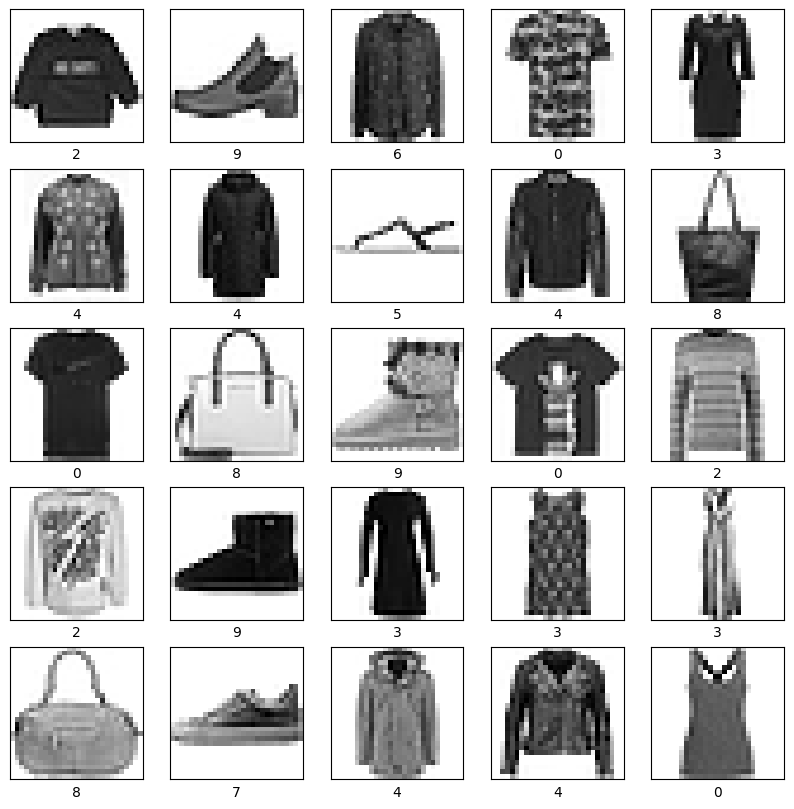

In [25]:
# Visualize a few examples from the training dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(np.argmax(train_labels[i]))
plt.show()

In [28]:
train_images=train_images.astype('float32')/255.0
test_images=test_images.astype('float32')/255.0


model=Sequential([
Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
MaxPooling2D((2,2)),
Conv2D(64,(3,3),activation='relu'),
MaxPooling2D((2,2)),
Conv2D(64,(3,3),activation='relu'),
Flatten(),
Dense(64,activation='relu'),
Dropout(0.5),
Dense(10.activation='softmax')])

In [31]:
model=Sequential([ 
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)), 
    Conv2D(64,(3,3),activation='relu'),
    Flatten(), 
    Dense(64,activation='relu'), 
    Dropout(0.5), 
    Dense(10,activation='softmax')])

In [32]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
history=model.fit(train_images,train_labels,
          batch_size=128,epochs=10, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.0981 - loss: 2.3026 - val_accuracy: 0.0972 - val_loss: 2.3027
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.0984 - loss: 2.3027 - val_accuracy: 0.0972 - val_loss: 2.3026
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.0994 - loss: 2.3027 - val_accuracy: 0.0972 - val_loss: 2.3027
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.1011 - loss: 2.3026 - val_accuracy: 0.0971 - val_loss: 2.3027
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.1000 - loss: 2.3027 - val_accuracy: 0.0971 - val_loss: 2.3027
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.1005 - loss: 2.3026 - val_accuracy: 0.0972 - val_loss: 2.3026
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.1025 - loss: 2.3026 - val_accuracy: 0.0971 - val_loss: 2.3027
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.0969 - loss: 2.3027 - 

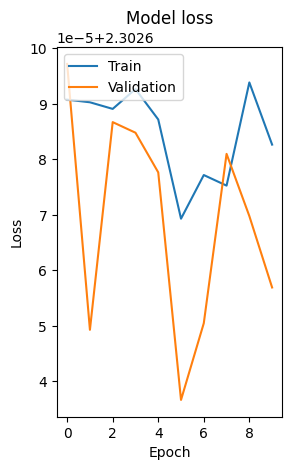

In [43]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [44]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print("Accuracy: ",test_acc*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0976 - loss: 2.3026
Accuracy:  10.000000149011612


In [45]:
labels = ['t-shirt','trouser','pullover','dress','coat','sandal','sneakers','shirt','bag','ankle boots']

In [46]:
predictions=model.predict(test_images[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


shirt


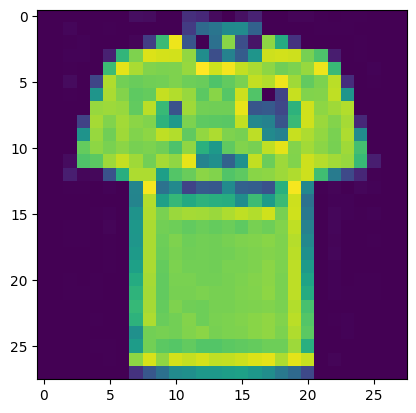

In [47]:
label=labels[np.argmax(predictions)]
print(label)
plt.imshow(test_images[:1][0])
plt.show()

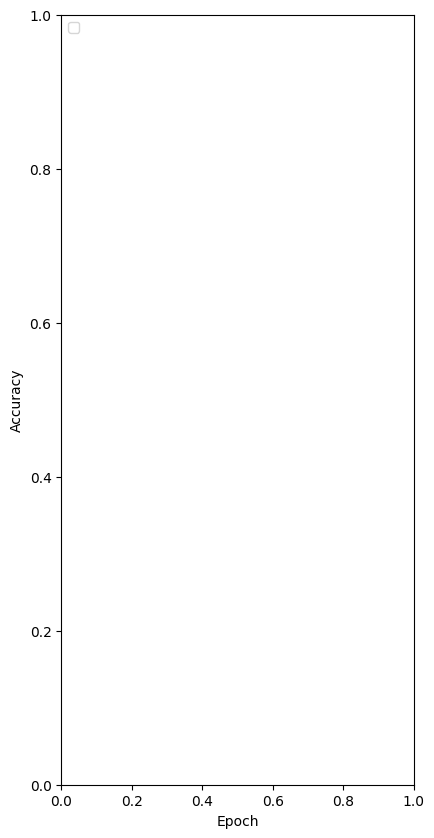

In [48]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
